# OBS: Den här notebooken kanske kommer byta namn
I den här notebooken så kommer vi bygga vår första ML-modell
- Den kommer att vara en klassifikationsmodell på irisdatasetet

Kort beskrivning av ML-processen: 

1. Ladda in data
2. Dela in datan i träningsdata och testdata (70/30 ofta)
3. Skapa en tom modell
4. Träna modellen på träningsdatan
5. Testa modellen (använd testdatan)


In [1]:
# Vi börjar med import av moduler 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Vi laddar in vårt dataset

iris = datasets.load_iris()

In [3]:
# Inspektera indatan 

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Konvertera till en dataframe 

df = pd.DataFrame(data = np.c_[iris['data'], iris["target_names"][iris['target']]],
                        columns = iris['feature_names'] + ['species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# Konvertera alla siffror till float64, annars kan det gå lite vajsing

df["sepal width (cm)"] = pd.to_numeric(df["sepal width (cm)"])
df["sepal length (cm)"] = pd.to_numeric(df["sepal length (cm)"])
df["petal width (cm)"] = pd.to_numeric(df["petal width (cm)"])
df["petal length (cm)"] = pd.to_numeric(df["petal length (cm)"])

In [6]:
iris.feature_names
df[iris.feature_names]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# 2. Dela in data i träning- och testdata
# Konvention: Inom ML så är X typiskt namnet på input, och y är output
# Likt matematik, där våra ekvationer typiskt är på formen y = f(x)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df["species"], random_state=0, train_size=0.7)

In [8]:
# Kikar på X_train
# Vi kan se att vi har en dataframe med 70% av datan i sig
# Den har bara våra avsedda featurekolumner i sig

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [9]:
y_train

60     versicolor
116     virginica
144     virginica
119     virginica
108     virginica
          ...    
9          setosa
103     virginica
67     versicolor
117     virginica
47         setosa
Name: species, Length: 105, dtype: object

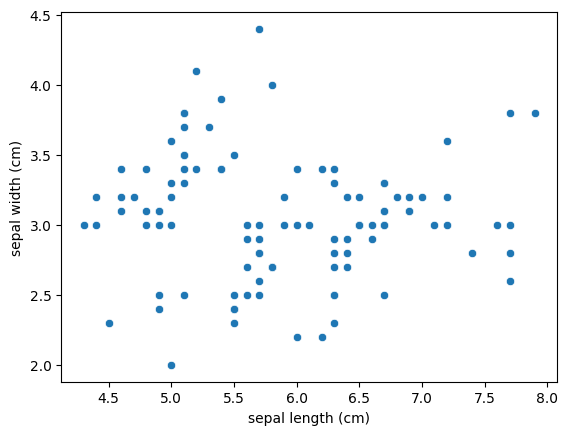

In [10]:
# Vi kan ställa upp en scatterplot, där vi jämför egenskaper hos olika features
# mellan olika arter. 

import seaborn as sns

sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", data=X_train)
plt.show()

In [11]:
# 3. Skapa en tom modell
# Vi kommer att använda oss av Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [12]:
# 4. Träna modellen på träningsdatan
# Jippie! Vi har byggt vår första ML-modell

logreg.fit(X_train, y_train)

/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# 5. Testa modellen på vår testdata

y_pred = logreg.predict(X_test)

In [14]:
# Inspekterar y_pred, alltså vår modells predictions 
# Vi kan se att de är en lista av olika arter

y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [15]:
# Vi kan också få en siffra på hur bra vår modell lyckades

logreg.score(X_test, y_test)

0.9777777777777777